# **Анализ данных интернет-магазина  «Стримчик»**

Интернет-магазин «Стримчик» - продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). У меня есть данные до 2016 года.

**Цель исследования: Проанализировать данные и выявить определяющие успешность игры закономерности, для того чтобы обозначить потенциально популярный продукт и спланировать рекламные кампании на 2017 год.**

**Ход исследования:**

После подготовки данных будет проведено исследование и анализ таких показателей как:

- сколько игр выпускалось в разные годы (важны ли данные за все периоды?)
- как менялись продажи по платформам 
- выделить данные за соответствующий актуальный период, для того чтобы построить прогноз на 2017 год.
- выделить несколько потенциально прибыльных платформ
- изучить график по глобальным продажам игр в разбивке по платформам
- как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков
- общее распределение игр по жанрам (самые прибыльные жанры)

Для решения поставленных задач необходимо будет:

- Составить портрет пользователя каждого региона. Определить для пользователя каждого региона (NA, EU, JP):
  - Самые популярные платформы (топ-5). Опишите различия в долях продаж
  - Самые популярные жанры (топ-5). Поясните разницу
  - Влияет ли рейтинг ESRB на продажи в отдельном регионе?

- Проверить 2 гипотезы:
  - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
  - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные


**Таким образом, исследование пройдёт в 6 этапов:**

1. Обзор данных.
2. Предобработка данных.
3. Исследовательский анализ данных
4. Портрет пользователя каждого региона
5. Проверка гипотез
6. Выводы

## Этап 1. Обзор данных

Импортируем библиотеки

In [1]:
import pandas as pd
import math 
from math import factorial 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

Прочитаем и рассмотрим датафрейм

In [2]:
df = pd.read_csv('games.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.sample(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
2502,Scooby-Doo! First Frights,DS,2009.0,Action,0.60,0.16,0.00,0.07,NaN,NaN,NaN
9355,Retro Atari Classics,DS,2005.0,Misc,0.12,0.00,0.00,0.01,51.0,3.7,E
1592,Pokemon XD: Gale of Darkness,GC,2005.0,Role-Playing,0.71,0.19,0.31,0.03,64.0,8.3,E
10402,Busou Shinki: Battle Masters Mk. 2,PSP,2011.0,Action,0.00,0.00,0.11,0.00,NaN,NaN,NaN
7399,WCW Nitro,N64,1998.0,Fighting,0.17,0.04,0.00,0.00,NaN,NaN,NaN
6033,Shrek: Forever After,Wii,2010.0,Platform,0.18,0.09,0.00,0.03,NaN,tbd,E10+
12659,Satisfashion,DS,2010.0,Misc,0.05,0.00,0.00,0.00,NaN,NaN,NaN
2350,Fossil Fighters,DS,2008.0,Role-Playing,0.83,0.00,0.00,0.06,70.0,7.9,E
3350,Split/Second,X360,2010.0,Racing,0.32,0.23,0.00,0.06,82.0,8.1,E10+
10825,One Piece: Burning Blood,PSV,2016.0,Fighting,0.00,0.02,0.07,0.00,62.0,7.8,T


In [5]:
df.duplicated().sum()

0

### Вывод

Предоставленная таблица иммет набор данных по продажам игр на разных платформах, с оценками пользователей и рейтингом от критиков по разным регионам.
На первом этапе выявлено следующее:
1. стилистика названий столбцов нарушена, необходимо привести названия к нижнему регистру
2. тип данных столбцов Year_of_Release лучше заменить на целочисленные int, столбец User_Score имеет тип данных object заменим на числовой float, для удобства в исследовании.
3. в столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating содержатся пропуски
4. явные дубликаты отсутсвуют

## Этап 2. Предобработка данных

Приведем название столбцов к нижнему регистру

In [6]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Необходимо привести данные к нужным типам. 

Данные в столбце года релиза и оценки критиков целочисленные. 

Данные в столбце оценок от пользователей должны быть числами с плавающей точкой, так как оценки исчисляютсяпо 10 балльной шкале.

Но так как в данных столбцах есть пропуски, необходимо сначала избавиться от них, а после этого уже корректно произвести замену типа. 

**Пропуски**

**Столбец name**

In [7]:
df[df.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Об этих играх нет достаточных данных, в строках имеется много пропусков, нужно эти строки удалить.

In [8]:
df = df.dropna(subset = ['name'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


**Столбец year_of_release**

In [9]:
df['year_of_release'].isna().sum()

269

In [10]:
'процент пропусков от всего датасета', df['year_of_release'].isna().mean()*100

('процент пропусков от всего датасета', 1.6095255190570215)

Пропуски в этой колонке составляют 1.6 % от всего датасета. Заполнять такие данные медианой или средним значением будет некорректно, ведь игры между собой никак не связаны. Можно было бы восстановить год по указанному значению в названии игры, но не в каждом жанре в названии игры указывается именно год выпуска, считаю это нецелесообразным. Или заполнить пропуски датой выхода платформы на которую рассчитана игра, если с Wii, PS2 и PS3 более менее понятно, то вопросы возникают с PC, какой год указать. Лучше сэкономить время и нервы и удалить такие пропуски, так как они не велики.

In [11]:
df = df.dropna(subset = ['year_of_release'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Сразу же приведу года в тип данных int, так как года измеряются целыми числами

In [12]:
df['year_of_release'] = df['year_of_release'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


**Cтолбцы user_score и critic_score**

В этих столбцах нельзя выявить средние или медианные закономерности по году или жанру. Каждая игра получается индивидуальной и оценка критиков, и пользователей - субъективное мнение об игре конкретного года, жанра, платформы, студии разработчика, издателя, рекламы и репутации о серии игр. Слишком много факторов необходимо учесть для восстановления данных. 

Аббревиатура "tbd" означает to be determined, то есть в будущем подлежит определению. Я думаю, что можно заменить эти значения на nan

In [13]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = float('nan')
df['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', nan], dtype=object)

Заменим тип данных столбца user_score на числовой, для удобства дальнейшего исследования

In [14]:
df['user_score'] = df['user_score'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Что касается перевода critic_score в тип данных 'int', я не стала этого делать, хотя в колонке находятся целочисленные показатели, чтобы в будущем, если понадобится посчитать, к примеру, корреляцию между critic_score и user_score данные находились в одной размерности. 

**Cтолбец  rating**

In [15]:
df[df.rating.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Видно, что пропуски в колонке rating встречаются вместе с пропусками в колонках critic_score, user_score. Пропуски есть независимо от того новая это игра или старая, на какой платформе можно в нее поиграть, а также жанры встречаются разные. Удалить строки с пропусками я так же  не могу. В данном случае можно поставить "заглушку" - 'Unknown'

In [16]:
df['rating'] = df['rating'].fillna('Unknown')
df.rating.value_counts()

Unknown    6676
E          3921
T          2905
M          1536
E10+       1393
EC            8
K-A           3
AO            1
RP            1
Name: rating, dtype: int64

Изучив данные рейтинги я нашла их определения:

- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»
- K-A - старый вариант маркировки E (for everyone)

 Исходя из этого можно заменить заглушку 'Unknown' на 'RP' , 'K-A' на 'E' и 'AO' на 'M'

In [17]:
df.loc[df['rating'] == 'Unknown', 'rating'] = 'RP'
df.loc[df['rating'].isin(['K-A']), 'rating'] = 'E'
df.loc[df['rating'] == 'AO', 'rating'] = 'M'


df.rating.value_counts()

RP      6677
E       3924
T       2905
M       1537
E10+    1393
EC         8
Name: rating, dtype: int64

Для определения рейтинга издатель присылает в ESRB видеоролик, который содержит наиболее впечатляющие и резкие сцены игры. Также издатель заполняет специальную анкету сведениями о содержании игры.

На веб-сайте ESRB сообщается, что затем рецензенты независимо оценивают продукт и определяют рейтинг. Оценкой рейтинга занимаются многие люди разных возрастов и слоёв общества. Если рецензенты сходятся в оценке, то к рейтингу добавляют краткие описания и ESRB уведомляет издателя о своём решении.

Причиной такого болоьшого количества пропусков может быть то, что некоторые создатели игр просто не посчитали нужным отправлять заявку в негосударственную компанию для оценки своей игры, либо рецензенты не сошлись в оценках. А учитывая что в данных очень много игр без оценок, это и могло повлиять на невозможность определня рейтинга.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


**Дубликаты**

В первом этапе мы уже определелили, что я вные дубликаты отсутсвуют. Так же проверим дубликаты по ключевым параметрам (подмножеству). По названию игры, платформе и году.

In [19]:
duplicate_df = df.loc[:, 'name':'year_of_release']


In [20]:
duplicate_df.duplicated().sum()

1

**Из выделенного подможества при проверке был обнаружен один дубликат, удалим эту строку, так как одна строка никак не повлияет на ход исследования**

In [21]:
duplicate_df.drop_duplicates()

,name,platform,year_of_release
0,Wii Sports,Wii,2006
1,Super Mario Bros.,NES,1985
2,Mario Kart Wii,Wii,2008
3,Wii Sports Resort,Wii,2009
4,Pokemon Red/Pokemon Blue,GB,1996
...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016
16711,LMA Manager 2007,X360,2006
16712,Haitaka no Psychedelica,PSV,2016
16713,Spirits & Spells,GBA,2003


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


**Суммарные продажи во всех регионах**

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец - total_sales

In [23]:
sales=['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
df['total_sales'] = df[sales].sum(axis=1)
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,RP,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,RP,28.31


### Вывод

Данные готовы к анализу. Было выполнено следующее.

- Исправлены названия столбцов, приведены к нижнему регистру.
- Дублиактов не обнаружено.
- Удалены 2 строки не поддающиеся восстановлению, а так же 1,6% данных которые не подходят для исследования по причине отсутствия года выпуска.
- Обработаны пропуски, с объяснением почему заполнено именно так и почему в некоторых столбцах этого лучше не делать.
- Преобразованы данные в нужные типы, для дальнейшей корректной работы.
- Аббревиатура "tbd" заменена на NaN, т.к. она означает, недостаточное количество оценок для выставления общей.
- Добавлен столбец суммарных продаж по регионам.

## Этап 3. Исследовательский анализ

### 3.1 Сколько игр выпускалось в разные годы (важны ли данные за все периоды?)

Создадим таблицу с количеством выпускаемых игр по каждому году.

In [24]:
df_years = df.pivot_table(index='year_of_release', values='name', aggfunc='count')
df_years.columns = ['count_games']

df_years

,count_games
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Для наглядности построим график

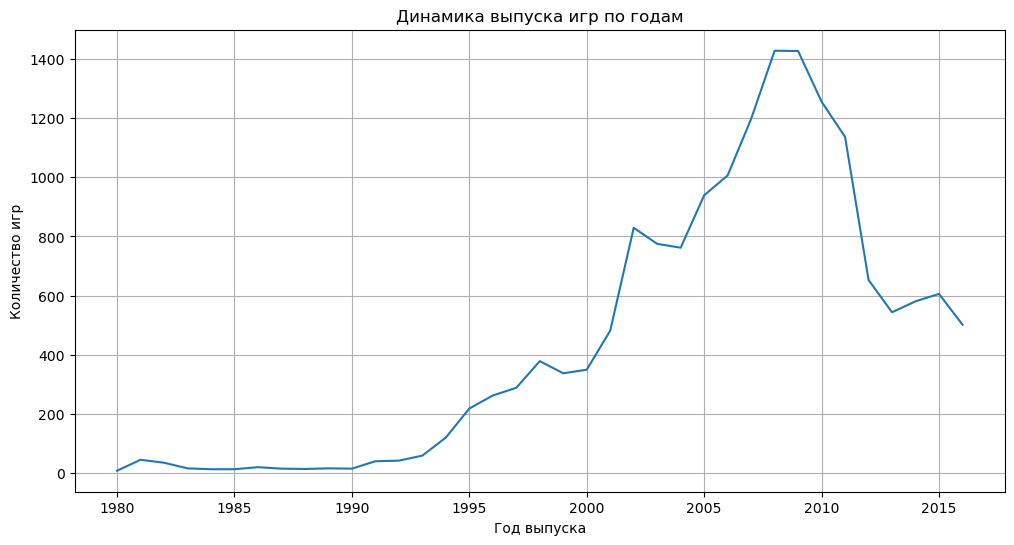

In [25]:
df_years.plot(figsize=(12, 6), legend=False, grid=True, title='Динамика выпуска игр по годам')\
.set(xlabel='Год выпуска', ylabel='Количество игр')

plt.show()


**Вывод**

На графике видно, что развитие игр с 1980 года по 2000 было слабым. Тенденция выпускать больше игр пришла вместе с технологическим прорывом: появлением персонального компьютера (PC) и технологий языков программирования.

В 2000 году мы видим активный рост количества игр. Продолжался этот рост до 2009 года. 

На 2008 и 2009 год приходится пик графика, значит в эти года производили больше всего игр (1427 и 1426 игр соответсвенно). 

Начиная с 2010 года количество выпускаемых игр значительно снизилось.

Данные за все периоды важны, благодаря этому можно проследить динамику разработки игр.

### 3.2 Как менялись продажи по платформам

Создадим таблицу с общей суммой продаж по каждой платформе.

In [26]:
df_sales = df.pivot_table(index=['platform'], values='total_sales', aggfunc='sum')\
.sort_values('total_sales',ascending=False)
df_sales

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Для наглядности построим график

Text(0, 0.5, 'Количество игр млн. шт.')

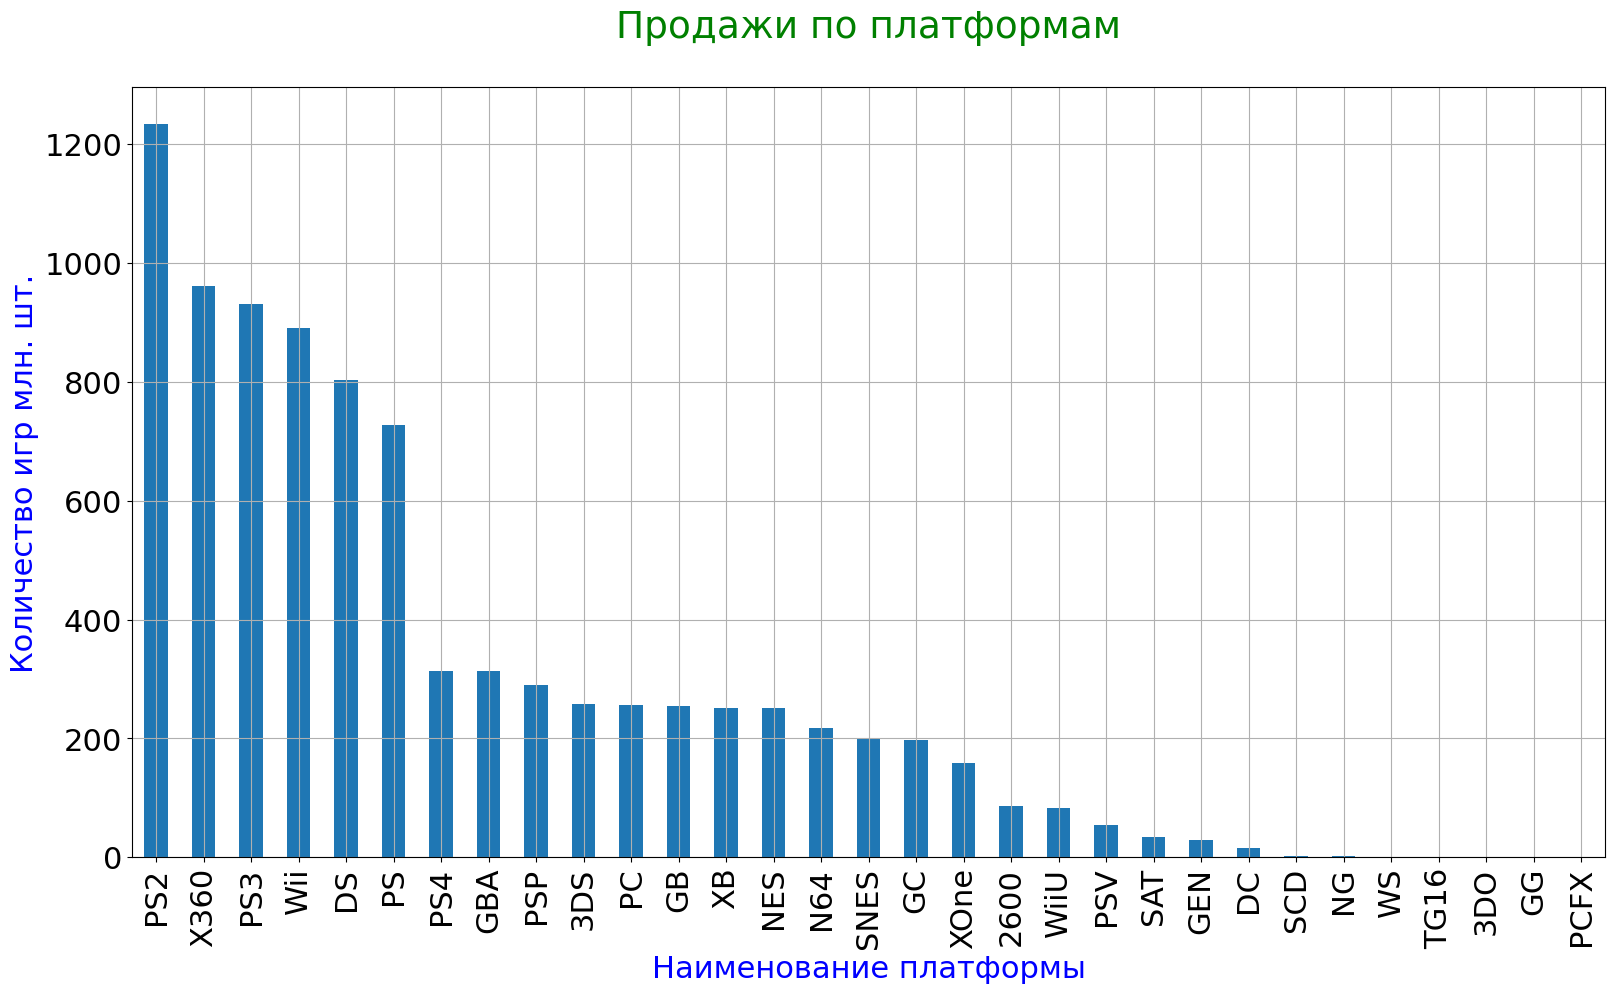

In [27]:
df_sales.plot(
    kind = 'bar',
    figsize = (19,10), 
    legend = False, 
    fontsize = 22,  
    grid=True,
)
plt.title('Продажи по платформам' + "\n", fontsize=27, color='Green')
plt.xlabel('Наименование платформы', fontsize=22, color='Blue')
plt.ylabel('Количество игр млн. шт.', fontsize=22, color='Blue')


На графике видно, что есть 6 явно лидирующих платформ по суммарным продажам. Рассмотрим их подробнее.

Построим для каждой платформы, графики распределения по годам

PS2


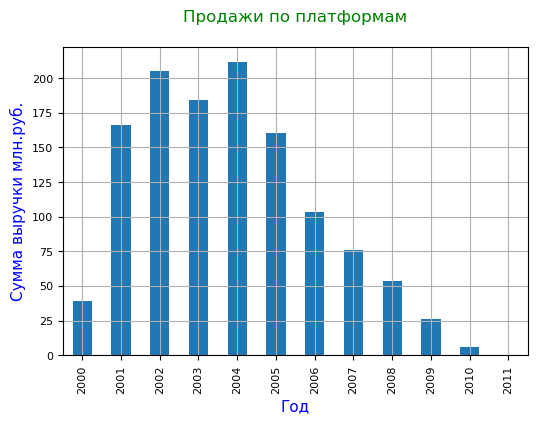

X360


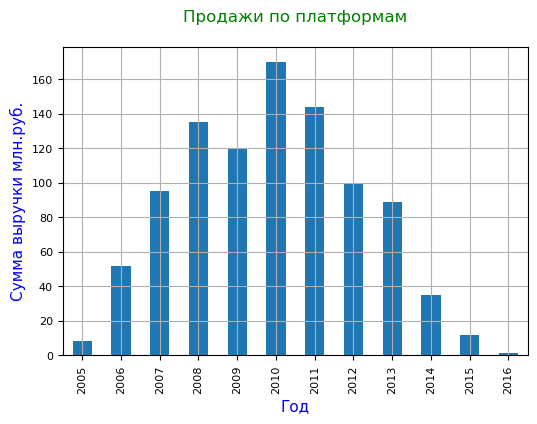

PS3


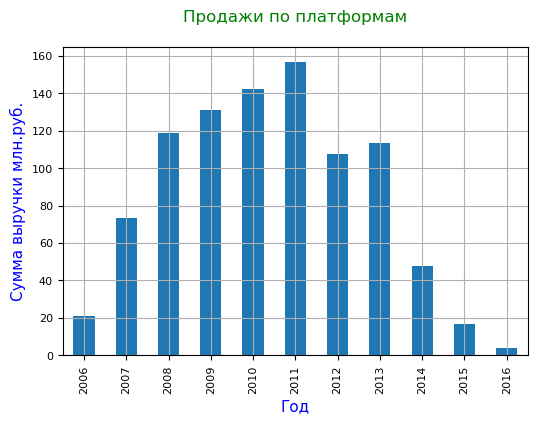

Wii


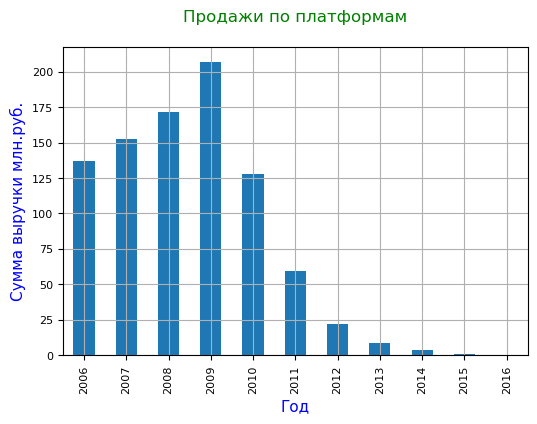

DS


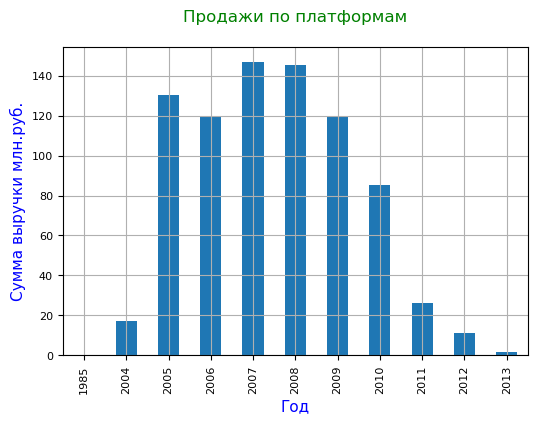

PS


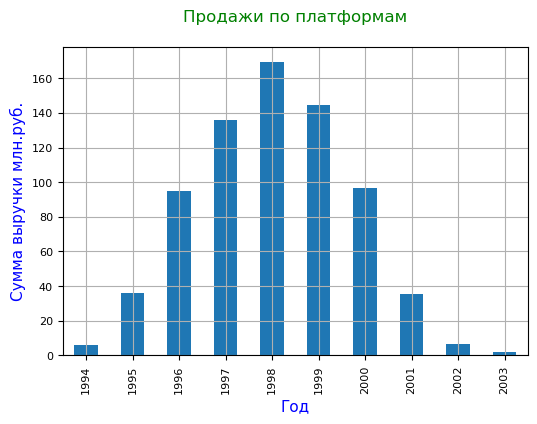

In [28]:
for platform in df_sales.index[:6]:
    print(platform)
    (df
     .query('platform == @platform')
     .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
     .plot(kind='bar',
           figsize = (6,4),  
           fontsize = 8, 
           legend = False,
           grid=True)
    )
    plt.title('Продажи по платформам' + "\n", fontsize=12, color='Green')
    plt.xlabel('Год', fontsize=11, color='Blue')
    plt.ylabel('Сумма выручки млн.руб.', fontsize=11, color='Blue')
    plt.show()

Из графиков видно, что для платформ, которые пользуются популярностью, срок использования равен 8-12 лет.

По всем платформам наблюдается тенденция резких стартов продаж, затем паение после выхода консоли нового поколения, но вместе с этим выгода купить старую модель плюс поддержка старых моделей разработчиками помогает добиться плавности спада продаж. 

- PS2. Резкий скачок продаж наблюдается с 2000 по 2002 гг. В 2004 год пик, Затем продажи постепенно падают, от части связано с тем, что в 2006 году вышла PS3, но даже не смотря на это продажи продолжались, наверняка с выходом новой консоли старая стала стоить дешевле, а поддержка старой версии от разработчиков еще была.
- X360. 2005-2008 продажи расли, пик был достигнут в 2010 году после спада продаж в 2009, вероятно подъем связан в выходом популярных игр.
- PS3. Рост продаж с 2006 по 2011 гг. Затем стали падать с небольшим плато в районе 2012-2013 годов.
- Wii. Высокий старт продаж среди других платформ. Несмотря на медленный рост с 2006 по 200 9 гг по пиковой сумме опередила некоторые другие платформы. Затем продажи стали резко падать. Наверняка это связано с отсутствием выхода популярных игр.
- DS. Резкий рост продаж с 2004 по 2005 года. Далее медленный рост до 2008 года, после которого начался постепенный спад продаж.
- PS. Иммет стабильно постепенный рост в 1994 - 1998 гг и затем зеркальный спад.

На графике платформы DS была замечена аномалия. Рассмотрим подробнее это значение.

In [29]:
DS = df.loc[(df['platform'] == "DS") & (df['year_of_release'] < 2004)]
DS

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,RP,0.02


В интернете я не нашла связи между названием игры и платформой DS. Можно предположить, что "Strongest Tokyo University Shogi" - какая-то компьютерная игра в сёги которая разрабатывалась в Токийском Университете, при этом никакого отношения к платформе Nintendo DS она не имеет, потому что в 1985 году этой платформы еще не было.

Т.к. строка содержит ошибочные данные удалим ее.

In [30]:
df = df.drop(index=[15957]).reset_index(drop=True)

**Вывод**

Наибольшее количество продаж было у игр для PS2. Это легко объясняется тем, что японские производители далеко шагнули вперед в плане развития игровых консолей. Не было аналогов новому PS2, люди охотно покупали новую приставку, а вместе с ней и игры. 

В топ 6 конкурентов среди продаж вошли:
- PlayStation 2 (успешен в 2002-2004 годах)
- Xbox360 (успешен в 2010-2011 годах)
- PlayStation 3 (успешен в 2008-2011 годах)
- Wii Nintendo (успешен в 2006-2009 годах)
- Nintendo DS (успешен в 2007-2008 годах)
- PlayStation (успешен в 1998-1999 годах)

Остальные консоли не могут похвастаться таким объемом продаж. Новые платформы быстро набирают популярность, наращивают/удерживают ее в течение 3-4 лет и затем их продажи снижаются. 

### 3.3 Актуальные данные

Актуальный период на мой взгляд будет с 2013 гг., т.к. появились крайние передовые консоли PS4 и Xbox One. Следовательно, нам надо оставить 2016 год, 2015 год, 2014 год и 2013 год, все, что было раньше – нас не интересует. Рассматривая период с 2013 по 2016 год мы оценим продажи игр для находящихся возле пиков популярности современных платформ. Это поможет сделать корректный прогноз на 2017 год.

In [31]:
actual_df = df.query('year_of_release >= 2013')
actual_df.info()
actual_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 226.8+ KB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,RP,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


### 3.4 Лидирующие по продажам платформы (растут или падают).Потенциально прибыльные платформы.

Посмотрим на лидирующие по продажам платформы за актуальный период.

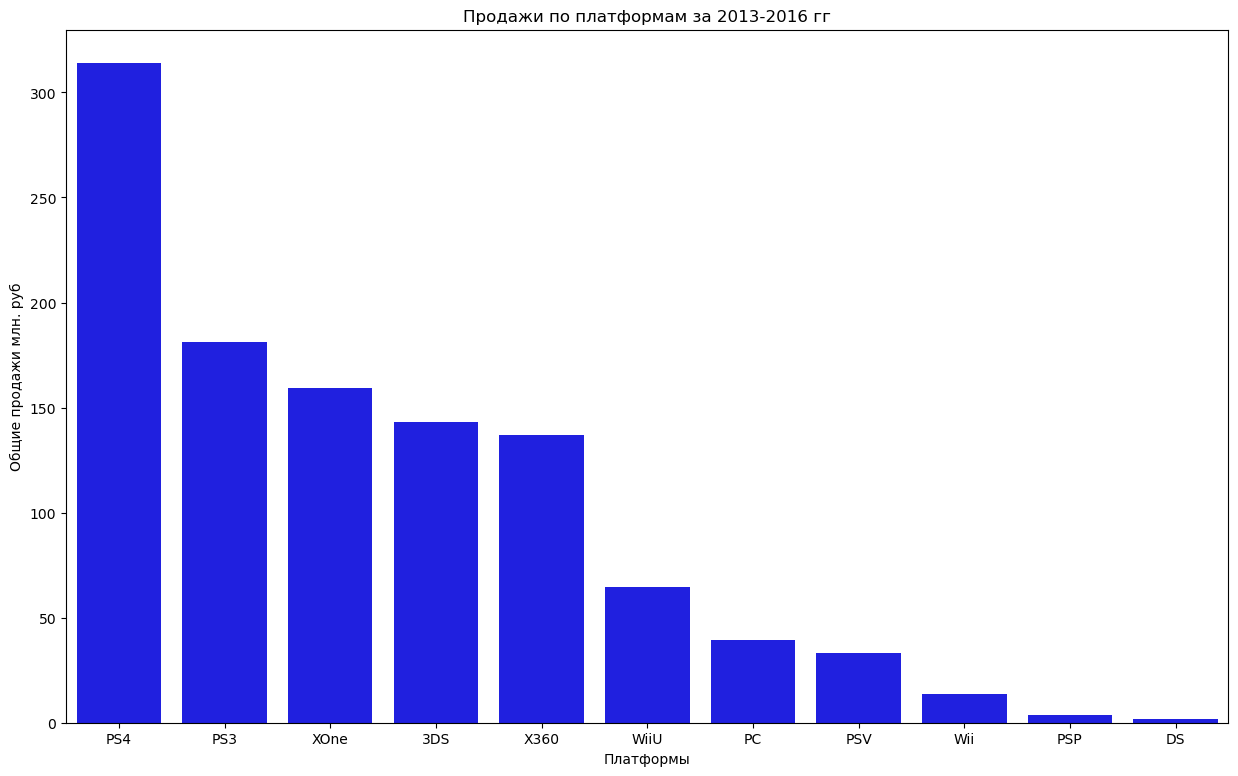

In [32]:
actual_df_platform = (
    actual_df
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values('total_sales', ascending=False)
)
plt.figure(figsize=(15, 9))
(sns.barplot(data = actual_df_platform, x=actual_df_platform.index, y = 'total_sales', color = 'blue')
    .set(title = 'Продажи по платформам за 2013-2016 гг', xlabel = 'Платформы', ylabel = 'Общие продажи млн. руб'))
plt.show()


На данном графике видно, что платформы, показывающие успешные показатели по продажам за 2013-2016 год значительно отличаются от того графика, где представлены продажи платформ за все время. Если раньше лидером по продажам был PS2, то сейчас на лидирующей строчке оказалась PS4, и почетное третье место по продажам игр за 2013-2016 год занимает XboxOne. PS4, PS3  и XboxOne являются привлекательнее остальных платформ.

Посмотрим, как менялись продажи по платформам за период с 2013 по 2016 годы.

In [33]:
actual_df.pivot_table(
        index='year_of_release',
        columns='platform',
        values='total_sales',
        aggfunc='sum').style.highlight_max(color='lightgreen', axis=1)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.570000,1.540000,12.380000,113.250000,25.990000,3.140000,10.590000,8.590000,21.650000,88.580000,18.960000
2014,43.760000,nan,13.280000,47.760000,100.000000,0.240000,11.900000,3.750000,22.030000,34.740000,54.070000
2015,27.780000,nan,8.520000,16.820000,118.900000,0.120000,6.250000,1.140000,16.350000,11.960000,60.140000
2016,15.140000,nan,5.250000,3.600000,69.250000,nan,4.250000,0.180000,4.600000,1.520000,26.150000


Визуализируем изменения продаж на графиках

PS4


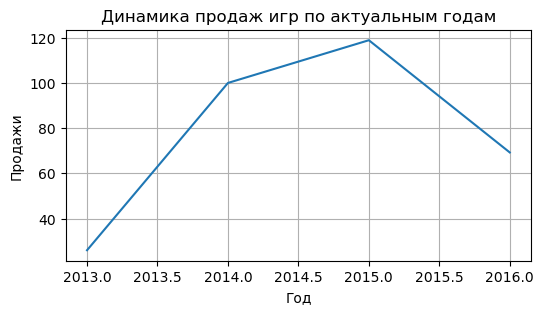

PS3


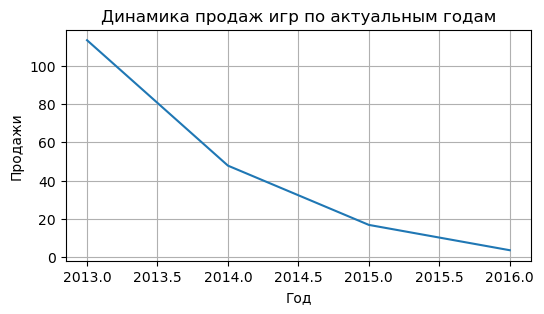

XOne


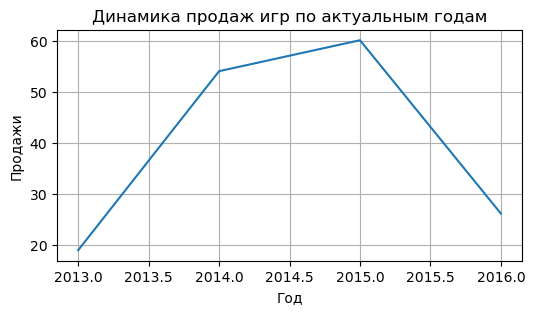

3DS


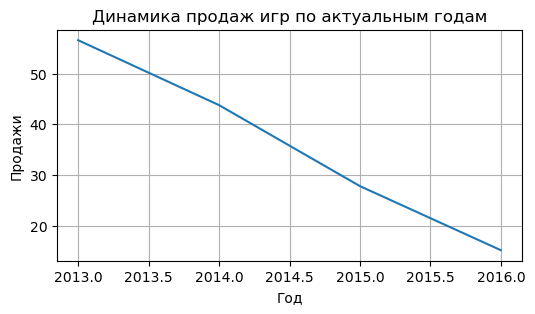

X360


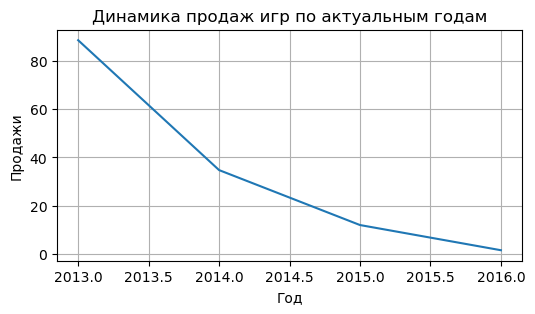

WiiU


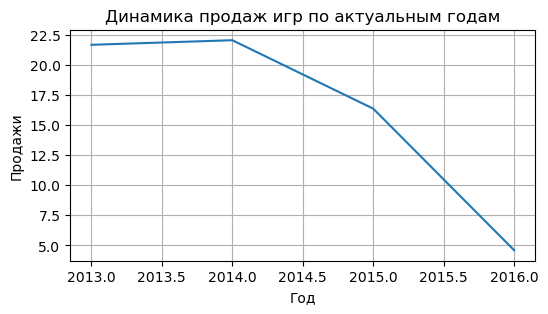

PC


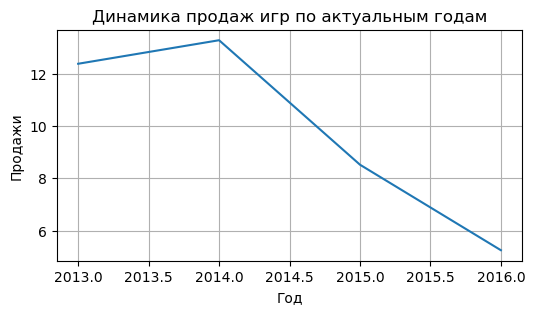

PSV


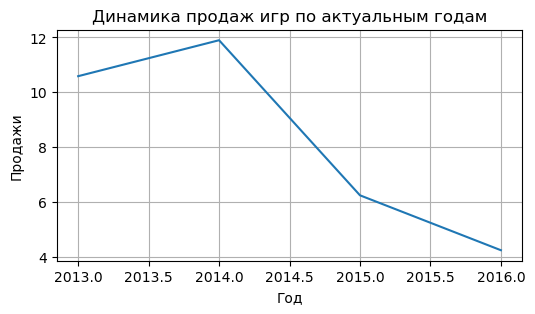

Wii


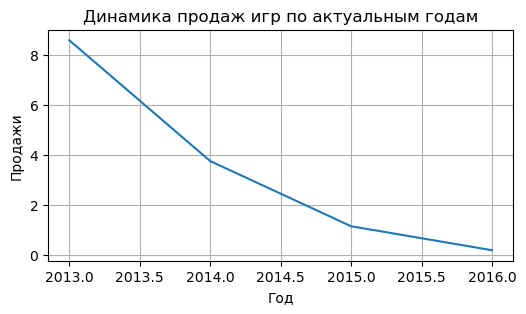

PSP


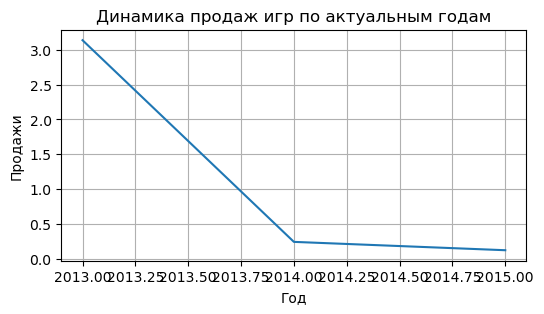

DS


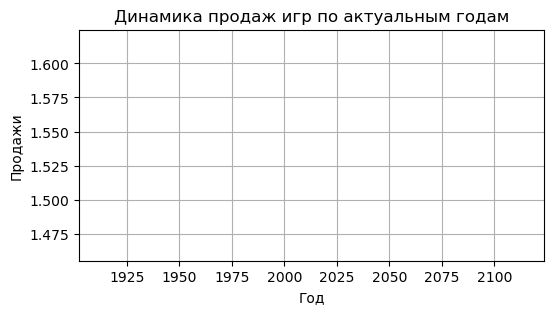

In [34]:
for platform in actual_df_platform.index:
    print(platform)
    (actual_df
     .query('platform == @platform')
     .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
     .plot(figsize=(6, 3), legend=False, grid=True, title='Динамика продаж игр по актуальным годам')
     .set(xlabel='Год', ylabel='Продажи')
    )
    
    plt.show()

**Вывод**

В актуальный период по общим продажам игр лидируют Sony PlayStation 4, Sony PlayStation 3 и Microsoft Xbox One.

Из таблицы видно, что приставки PS4 и XOne набирают популярность и были лидерами в 2014 и 2015 году, а также показывают лучшие результаты в 2016 году. Поскольку данные за 2016 год неполные, мы не можем сделать вывод по итогам года, однако, тренд сохраняется.** 

Приставки Nintendo 3DS, Sony PlayStation 3, Microsoft Xbox 360, Nintendo Wii утрачивает популярность, поскольку им на смену уже пришло новое поколение приставок. Ориентироваться на эти платформы не стоит.

Nintendo DS и Sony PlayStation Portable в 2016 году уже окончательно выбыли из гонки.

Потенциально прибыльные платформы: PS4, XOne

### 3.5 График «ящик с усами» по глобальным продажам игр в разбивке по платформам.

Построим диаграмму размаха

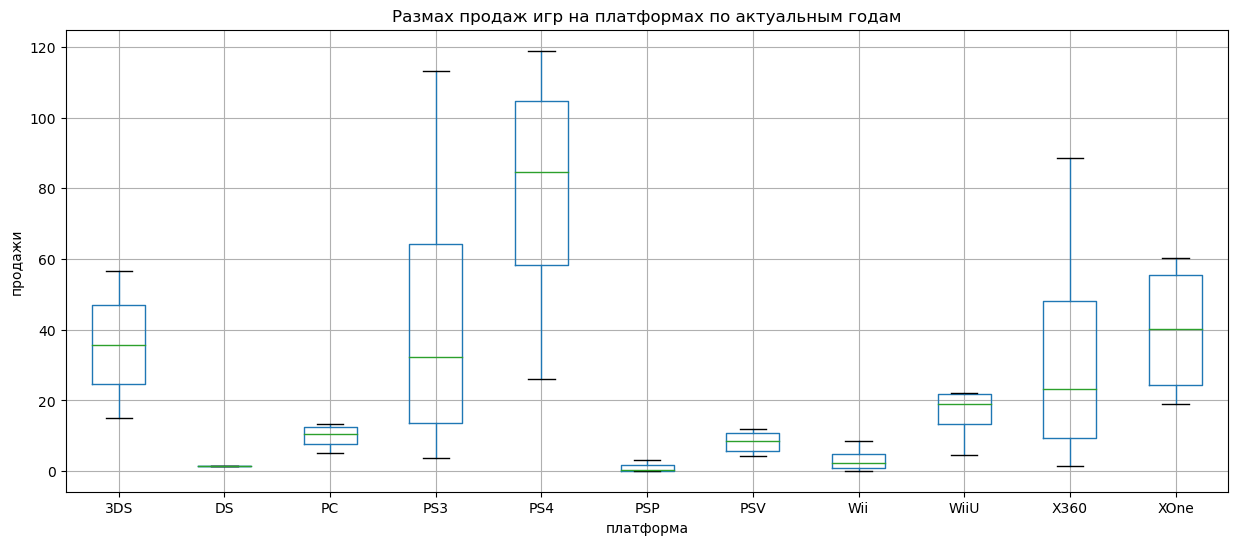

In [35]:
actual_df.pivot_table(
        index='year_of_release',
        columns='platform',
        values='total_sales',
        aggfunc='sum').boxplot(figsize=(15, 6))
    
plt.title('Размах продаж игр на платформах по актуальным годам')
plt.xlabel('платформа')
plt.ylabel('продажи')
plt.show()

**Вывод**

На диаграмме размаха видно, что медианы продаж в год на новых платформах (Sony PlayStation 4 и Microsoft Xbox One) выше медиан продаж соответствующих старых платформ (Sony PlayStation 3 и Microsoft Xbox 360). 

Явным лидером остается Sony PlayStation 4

### 3.6 Влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы.

В исследовани выше мы определелили две популярные и потенциально прибыльные платформы  PS4 и XOne. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами этих двух платформ. 

**Sony PlayStation 4**

In [36]:
ps4 = actual_df[actual_df['platform'] == 'PS4']
columns = ['user_score', 'critic_score', 'total_sales']
ps4[columns].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.557654,-0.031957
critic_score,0.557654,1.000000,0.406568
total_sales,-0.031957,0.406568,1.000000


Визуализируем через диаграммы рассеяния

[Text(0.5, 0, 'Оценка пользователей'), Text(0, 0.5, 'Продажи')]

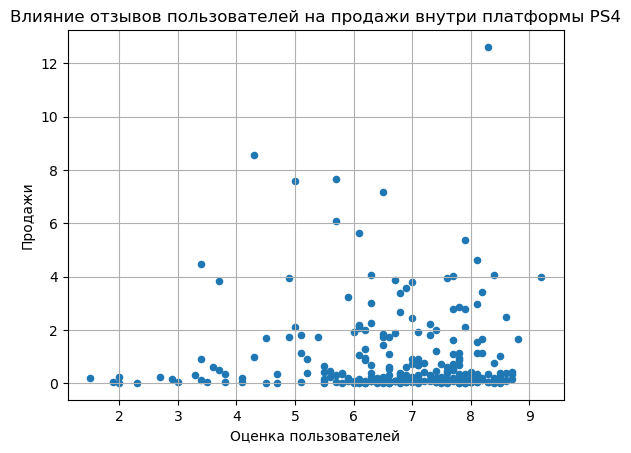

In [37]:
ps4.plot(x='user_score', 
         y='total_sales', 
         kind='scatter', 
         grid=True,
         title='Влияние отзывов пользователей на продажи внутри платформы PS4')\
.set(xlabel='Оценка пользователей', ylabel='Продажи')

Корреляционная оценка -0.03, взаимосвязь между оценкой игроков и продажами Sony PlayStation 4 практически отсутствует. Это подтверждает и диаграмма рассеяния. 

[Text(0.5, 0, 'Оценка критиков'), Text(0, 0.5, 'Продажи')]

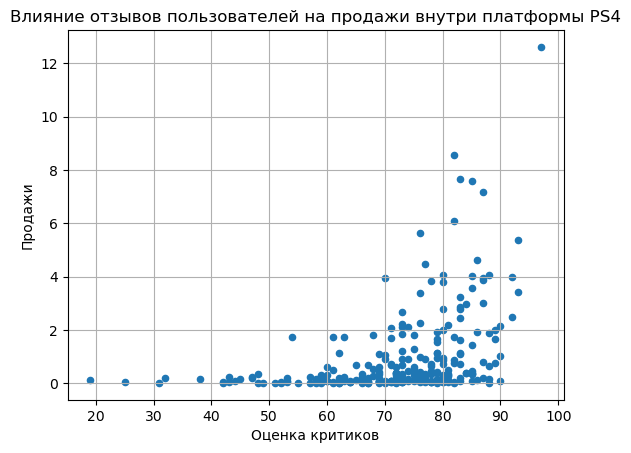

In [38]:
ps4.plot(x='critic_score', 
         y='total_sales', 
         kind='scatter', 
         grid=True,
         title='Влияние отзывов пользователей на продажи внутри платформы PS4')\
.set(xlabel='Оценка критиков', ylabel='Продажи')

Корреляционная оценка 0.4, взаимосвязь между оценкой игроков и продажами Sony PlayStation 4 средняя положительная. Тоесть чем выше оценка критиков, тем выше продажи. Это подтверждает и диаграмма рассеяния.

[Text(0.5, 0, 'Оценка критиков'), Text(0, 0.5, 'Оценка пользователей')]

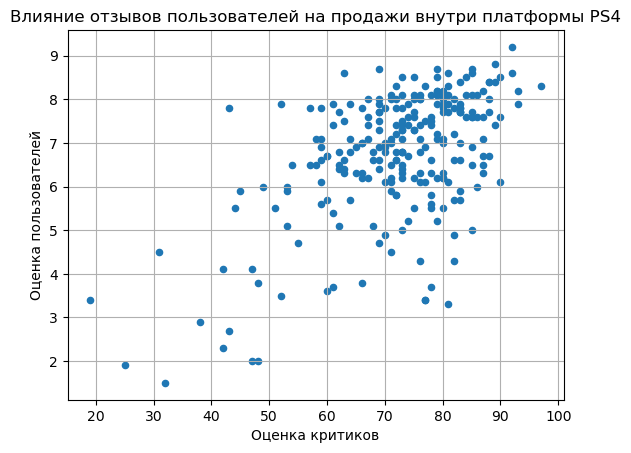

In [39]:
ps4.plot(x='critic_score', 
         y='user_score', 
         kind='scatter', 
         grid=True,
         title='Влияние отзывов пользователей на продажи внутри платформы PS4')\
.set(xlabel='Оценка критиков', ylabel='Оценка пользователей')

При исследовании я заметила интересную взаимосвязь оценок. Чем выше оценка критиков, тем выше оценка игроков. 

**Microsoft Xbox One**

In [40]:
x_one = actual_df[actual_df['platform'] == 'XOne']
columns = ['user_score', 'critic_score', 'total_sales']
x_one[columns].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.472462,-0.068925
critic_score,0.472462,1.000000,0.416998
total_sales,-0.068925,0.416998,1.000000


Визуализируем через диаграммы рассеяния

[Text(0.5, 0, 'Оценка пользователей'), Text(0, 0.5, 'Продажи')]

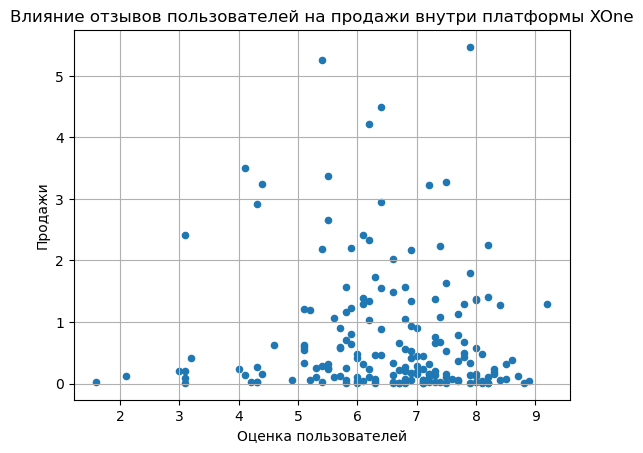

In [41]:
x_one.plot(x='user_score', 
         y='total_sales', 
         kind='scatter', 
         grid=True,
         title='Влияние отзывов пользователей на продажи внутри платформы XOne')\
.set(xlabel='Оценка пользователей', ylabel='Продажи')

Корреляционная оценка -0.06, взаимосвязь между оценкой игроков и продажами Microsoft Xbox One практически отсутствует. Это подтверждает и диаграмма рассеяния. 

[Text(0.5, 0, 'Оценка критиков'), Text(0, 0.5, 'Продажи')]

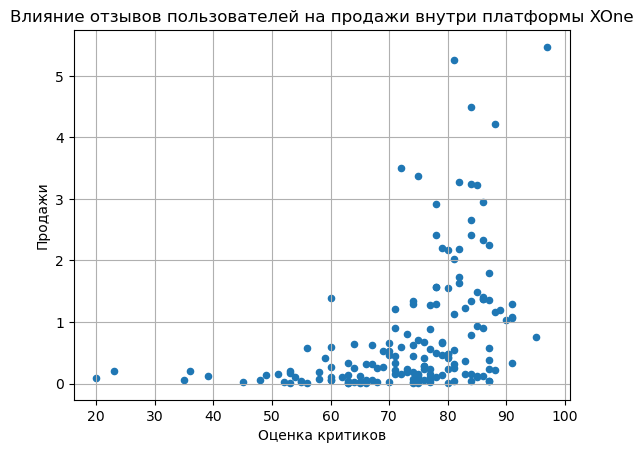

In [42]:
x_one.plot(x='critic_score', 
         y='total_sales', 
         kind='scatter', 
         grid=True,
         title='Влияние отзывов пользователей на продажи внутри платформы XOne')\
.set(xlabel='Оценка критиков', ylabel='Продажи')

Корреляционная оценка 0.42, взаимосвязь между оценкой игроков и продажами Microsoft Xbox One средняя положительная. Тоесть чем выше оценка критиков, тем выше продажи. Это подтверждает и диаграмма рассеяния.

Думаю, что стоит проверить взаимосвязь для других платформ, действительно ли игры с высокими оценками лучше продаются.

Проверим средние оценки игр критиками на каждой платформе

In [43]:
actual_df.groupby('platform')['critic_score']\
.mean()\
.sort_values(ascending=False)

platform
PC      75.550336
PSP     74.000000
XOne    73.325444
PS4     72.091270
WiiU    71.642857
PSV     71.636364
PS3     70.198347
X360    69.234568
3DS     68.338028
DS            NaN
Wii           NaN
Name: critic_score, dtype: float64

Из таблицы мы видим, что платформы PC и PSP занимают лидирующие позиции, хотя на графике общих продаж по платформам они в самом конце. Необходимо проверить количесво оценок критиков.

In [44]:
actual_df.groupby('platform')['critic_score'].count().sort_values(ascending=False)

platform
PS4     252
XOne    169
PC      149
PS3     121
X360     81
PSV      77
3DS      71
WiiU     70
PSP       1
DS        0
Wii       0
Name: critic_score, dtype: int64

Действительно для PSP всего одна оценка, а вот для PC оценок достаточно. Рассмотрим матрицу корреляции и диаграмму рассеяния для этой платформы.

In [45]:
pc = actual_df[actual_df['platform'] == 'PC']
columns = ['user_score', 'critic_score', 'total_sales']
pc[columns].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.429562,-0.093842
critic_score,0.429562,1.000000,0.196030
total_sales,-0.093842,0.196030,1.000000


[Text(0.5, 0, 'Оценка критиков'), Text(0, 0.5, 'Продажи')]

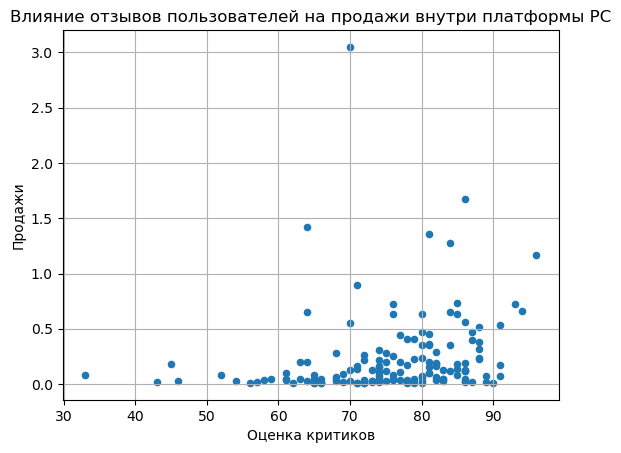

In [46]:
pc.plot(x='critic_score', 
         y='total_sales', 
         kind='scatter', 
         grid=True,
         title='Влияние отзывов пользователей на продажи внутри платформы PC')\
.set(xlabel='Оценка критиков', ylabel='Продажи')

**В данном случае такой явной взаимосвязи мы не видим. Коэффициент корреляции между отзывами критиков и продажами для платформы PC в 2 раза ниже, чем для Sony PlayStation 4. Опираться на корреляцию между оценками критиков и продажами игр для построения прогнозов не следует. Можно использовать в качестве дополнительного фактора принятия решений в случае платформ, для которых значение коэффициента корреляции выше и есть достаточно отзывов.**

**Вывод**

Взаимосвязи для PS4 и XOne между пользовательсикими оценками и продажами нет. А вот оценки критиков не так, чтобы сильно, но влияют на продажи игр, чем выше оценка критиков, тем больше происходит продаж. Но особо опираться на корреляцию между оценками критиков и продажами игр для построения прогнозов не следует.

### 3.7 Общее распределение игр по жанрам (самые прибыльные жанры)

Рассмотрим количество выпускаемых игр по жанрам (в актуальный период)

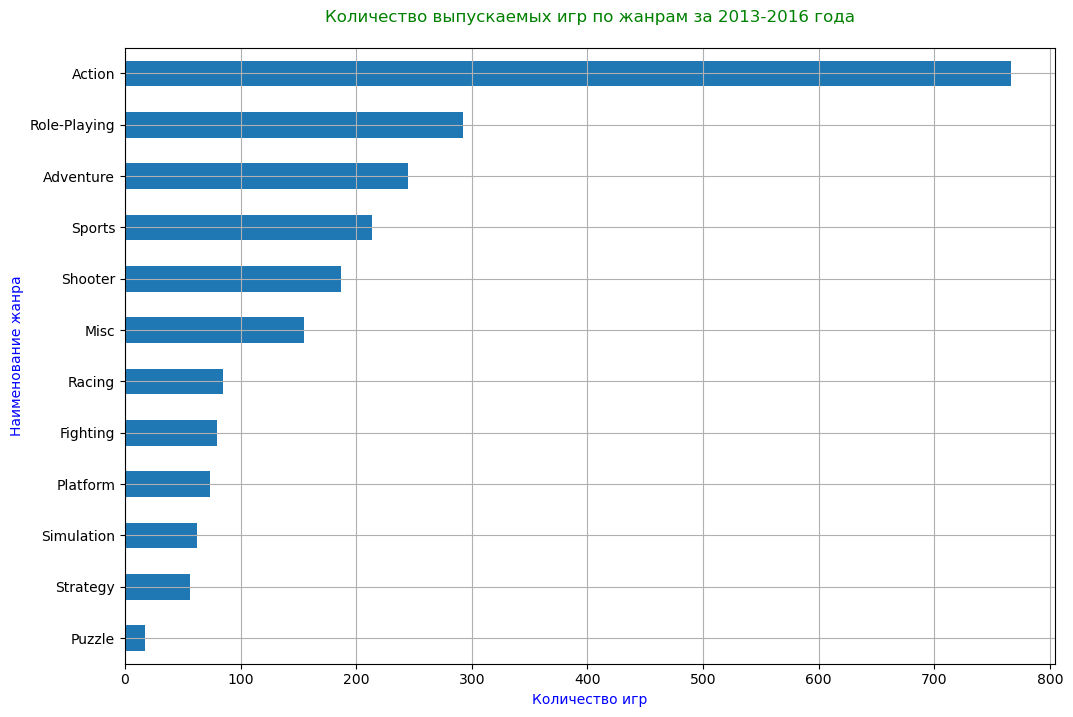

In [47]:
actual_df.groupby('genre')['name']\
    .count()\
    .sort_values(ascending=True)\
    .plot(kind='barh', x='genre', figsize=(12, 8), grid=True)

plt.title('Количество выпускаемых игр по жанрам за 2013-2016 года' + "\n", color='Green')
plt.xlabel('Количество игр', color='Blue')
plt.ylabel('Наименование жанра', color='Blue')
plt.show()

Cамым популярным жанром является Action. Реже всего выпускаются игры в жанре Puzzle

Рассмотрим самые прибыльные жанры (общие продажи игр по жанрам)

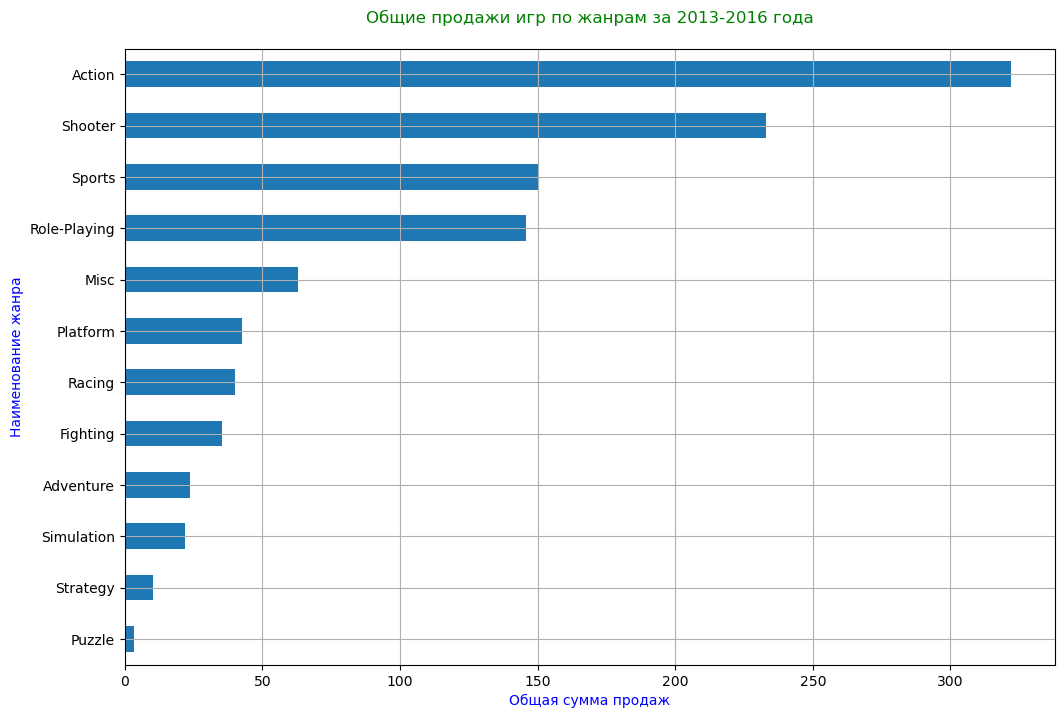

In [48]:
actual_df.groupby('genre')['total_sales']\
    .sum()\
    .sort_values(ascending=True)\
    .plot(kind='barh', x='genre', figsize=(12, 8), grid=True)

plt.title('Общие продажи игр по жанрам за 2013-2016 года' + "\n", color='Green')
plt.xlabel('Общая сумма продаж', color='Blue')
plt.ylabel('Наименование жанра', color='Blue')
plt.show()

Самый популярный жанр среди продаж Action и Shooter, чуть ниже Sports и Role-Playing. На последнем месте жанр Puzzle.

Рассмотрим диаграмму размаха для жанров, чтобы более точно определеить и наглядно рассмотреть самые прибыльные жанры.

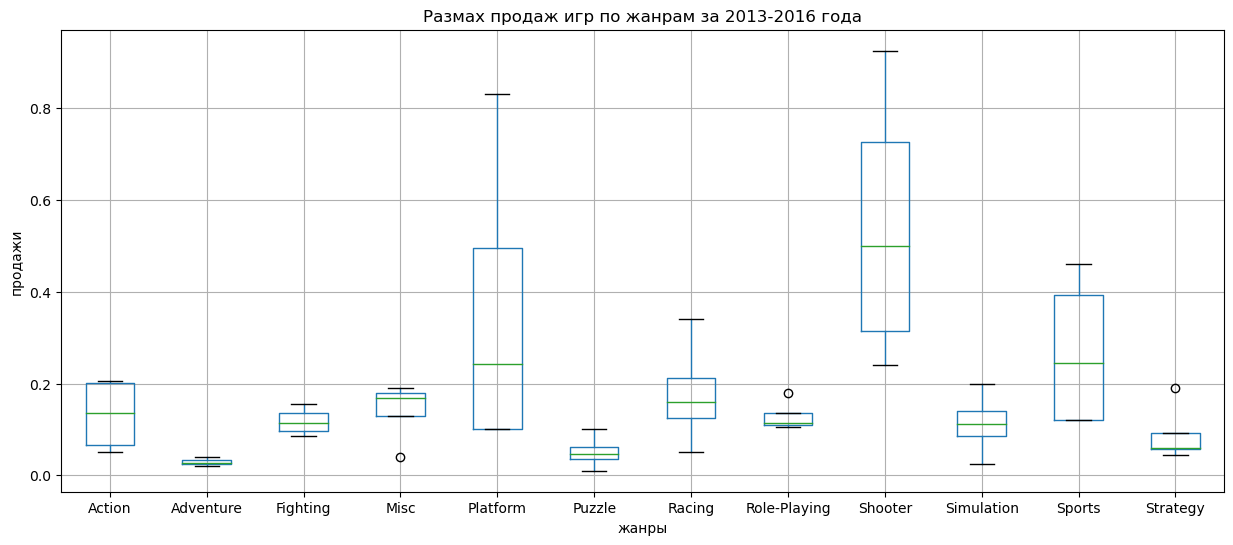

In [49]:
actual_df.pivot_table(
    index='year_of_release',
    columns='genre',
    values='total_sales',
    aggfunc='median').boxplot(figsize=(15, 6))
    
plt.title('Размах продаж игр по жанрам за 2013-2016 года')
plt.xlabel('жанры')
plt.ylabel('продажи')
plt.show()

При рассмотрении медиан мы видим уже другую картину. На данном графике видно, что хорошо продаются Shooter, медиана продаж данного жанра превосходит остальные жанры. Данный жанр можно считать привлекательным для продаж. Большинство жанров усредненные и имеют похожие медианы. Еще можно выделить Platform и Sports, они тоже имеют неплохие показатели. Неизменно самым популярным и прибыльным остается Shooter.

**Вывод**

Топ 4 популярных жанров среди продаж Action, Shooter, Sports и Role-Playing.
Неизменно самым популярным и прибыльным остается Shooter.

<div class="alert alert-success">
<b>Комментарий ревьюера (OK)</b>

Отлично, молодец, что рассмотрела не средние показатели. Действительно, кажется очень логичным сделать вывод на основе суммарных продаж. Но общие продажи – не лучшая метрика для поиска наиболее прибыльного жанра: за высокими показателями может скрываться множество мелких игр с низкими продажами, и лучше найти жанр, где игры стабильно приносят высокий доход.
</div>

### Вывод
**Актуальный период для исследования: 2013 - 2016 года**

**Топ 5 платформ по миру: PS4, PS3, XOne, X360 и 3DS**

**Самые популярные и потенциально прибыльные платформы на конец 2016 года - PS4, XOne**

**Нет взаимосвязи между оценками игроков и продажами. Присутствует связь между оценками критиков и продажами. Но как показало исследование, высокая оценка критиков не гарантирует высокие продажи**

**Самыми прибыльными жанрами можно считать экшен(Action), шутеры(Shooter), спортивные игры (Sports) и ролевые игры (Role-Playing).**

## Этап 4. Портрет пользователя каждого региона (NA, EU, JP)

Для того чтобы сформировать портрет пользователя каждого региона (NA, EU, JP) необходимо определить:

- Самые популярные платформы (топ-5).
- Самые популярные жанры (топ-5).
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Напишем функцию для построения графиков

In [50]:
# напишем функцию для построения графиков
def region(column):
    rows = 1
    cols = 3
    fig, axes = plt.subplots(rows, cols, figsize=(15,4))
    #создадим общий список по продажам
    region_list = ['na_sales', 'eu_sales', 'jp_sales']
    count = 0
    # пройдемся циклом по строкам и столбцам и построим графики для регионов
    for r in range(rows):
        for i in range(cols):
            df_new = actual_df.pivot_table(index=column, values = region_list[count], aggfunc = 'sum')\
            .sort_values(by=region_list[count], ascending = False)[:5]
            title_t = {'na_sales': 'Продажи в Северной Америке',\
                    'eu_sales': 'Продажи в Европе',\
                    'jp_sales': 'Продажи в Японии'}
            color_c = {'na_sales': 'blue', 'eu_sales': 'gray', 'jp_sales': 'green'}
            plot = df_new.plot(kind='bar', title=title_t[region_list[count]], ax=axes[i],\
                             fontsize=13, color=color_c[region_list[count]], rot=45)
            plot.set_xlabel('')
            count += 1

**Топ-5 популярных платформ в Северной Америке, Европе и Японии**

Text(0, 0.5, 'Сумма продаж')

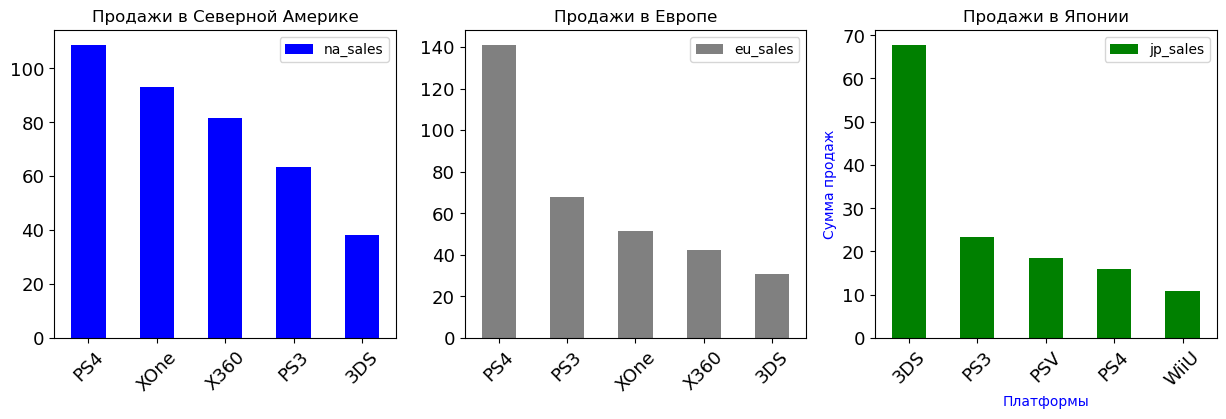

In [51]:
region ('platform') 
plt.xlabel('Платформы', color='Blue')
plt.ylabel('Сумма продаж', color='Blue')


- Топ 5 по Северной Америке: PS4, XOne, X360, PS3 и 3DS
- Топ 5 по Европейскому региону: PS4, PS3, XOne, X360 и 3DS
- Топ 5 по Японии: 3DS, PS3, PSV, PS4 и WiiU

Различия по популярности платформ в первую очередь зависят от влияния фирмы. Как результат во всех рейтингах есть продукция компании Sony.

Во-вторых - местоположение компании. Популярность XOne и X360 в Америке обусловлена крупным игроком на рынке в регионе - компания Microsoft. В Японии похожее положение занимает компания Nintendo c двумя продуктами 3DS и WiiU. Европейский рынок смотрит на общую популярность платформы, так как как нет крупных компаний по разработке платформ.

На Американском рынке по продажам соревнуются PS4 и XOne. Это вечные конкуренты и компания Microsoft не хочет отставать по продажам в своем регионе. В Европе нет такой сильной конкуренции - люди выбирают лучший и популярный продукт PS4. В Японии высокая конкуренция Nintendo и Sony за пользователей. Как видно у первой компании есть успехи в родном регионе. Но плохие показатели за его пределами. В целом продажи меньше, так как в этом регионе меньше игроков.

**Топ-5 популярных платформ в Северной Америке, Европе и Японии**

Text(0, 0.5, 'Сумма продаж')

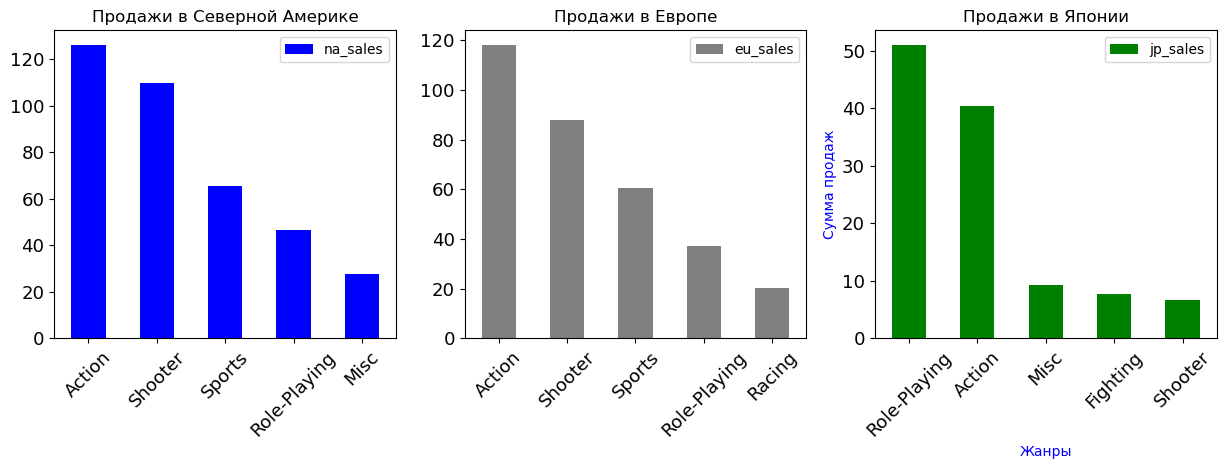

In [52]:
region ('genre') 
plt.xlabel('Жанры', color='Blue')
plt.ylabel('Сумма продаж', color='Blue')

- Топ 5 по Северной Америке: Action, Shooter, Sports, Role-Playing и Misc
- Топ 5 по Европейскому региону: Action, Shooter, Sports, Role-Playing и Racing
- Топ 5 по Японии: Role-Playing, Action, Misc, Fighting и Shooter

Американские и европейские игроки имеют схожите тенденции по жанрам в целом. Японские отличаются от них большим вкладом в игры с глубоким смыслом. Вне зависимости от региона всегда будут популярны игры экшен, т.к. многие поколения выросли на этом жанре, и шутеры, т.к. это имитация боевых действий.

**Влияние рейтинга ESRB на продажи в Северной Америке, Европе и Японии**

Text(0, 0.5, 'Сумма продаж')

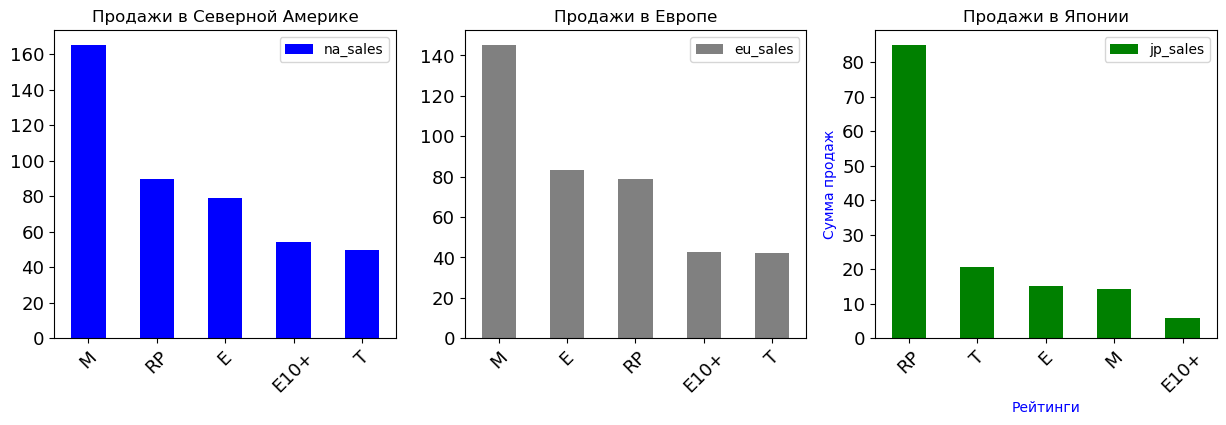

In [53]:
region('rating')
plt.xlabel('Рейтинги', color='Blue')
plt.ylabel('Сумма продаж', color='Blue')

- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»
- K-A - старый вариант маркировки E (for everyone)

Рейтинг возраста влияет по каждому региону.

В Америке и Европе схожие ситуации - в первую очередь популярны игры для взрослых. Это означает, что эти рынки ориентированы на взрослых пользователей.

В Японии большая часть продаж без рейтинга ESRB. Но лидириуют игры для подростков. Компании хотят распространить свое влияние на новое поколение.

### Вывод

**Первенство в мире (кроме Японии) по продажам поочередно удерживают такие крупные компании как Sony и Microsoft**

**Среднестатические игроки в Северной Америке и Европе похожи: отдают предпочтения играм жанров Action и Shooter, рейтингам М (для взрослых) и Е (для всех)**

**Игроки в Японии в принципе отличаются от остального мира. Очень популярны консоли портативного типа и игры, жанра Role-Playing. Игры рейтинга Т(для подростков) - самые популярные и Е (для всх). Родители покупают для детей и вместе проводят время за приставкой\компьютером**

<div class="alert alert-success">
<b>Комментарий ревьюера (ОК)</b> 

Да, согласна, в какой-то момент PS4 захватила рынок, а Нинтендо разрабатывалась специально для местной аудитории, не говоря у же о том, что в Японии в целом свои тенденции. По жанрам и рейтингам тоже все верно, подтверждается реальной обстановкой. Также отлично, что не исключила из рассмотрения неопределенный рейтинг - это добавило новые закономерности в части азиатского рынка, я бы предположила, что в Японии также есть свой рейтинг, который и занимает лидирующие позиции рынка.

## Этап 5. Проверка гипотез

### 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

В данной проверке гипотезы, мы рассматриваем две генеральные совокупности - игры для платформ PC и XBox

Для оценки гипотезы будем применять тест Стюдента. 

H0: Средние пользовательские рейтинги платформ Xbox One и PC равны.

H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

Уровень статистической значимости (alpha) зададим 5%

In [54]:
pc = actual_df[actual_df['platform'] == 'PC'] 
xone = actual_df[actual_df['platform'] == 'XOne']

alpha = 0.05
results = st.ttest_ind(pc['user_score'], xone['user_score'], nan_policy='omit')

print('Средняя оценка пользовательского рейтина платформ Xbox One:', xone['user_score'].mean().round(2))
print('Средняя оценка пользовательского рейтинга платформ PC:', pc['user_score'].mean().round(2))

print('Значение p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу о равенстве пользовательского рейтинга')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


Средняя оценка пользовательского рейтина платформ Xbox One: 6.52
Средняя оценка пользовательского рейтинга платформ PC: 6.27
Значение p-value:  0.14012658403611503
Не получилось отвергнуть нулевую гипотезу


**После проверки гипотезы у нас нет оснований утверждать, что средние пользовательские рейтинги платформ Xbox One и PC значимо различаются. P-значение — 14%.**

### 5.2 Средние пользовательские рейтинги жанров Action и Sports разные

В данной проверке гипотезы, мы рассматриваем две генеральные совокупности - игры жанров Action и Sports

Для оценки гипотезы будем применять тест Стюдента. 

H0: Средние пользовательские рейтинги жанров Action и Sports равны

H1: Средние пользовательские рейтинги жанров Action и Sports различаются

Уровень статистической значимости (alpha) зададим 5%

In [55]:
action = actual_df[actual_df['genre'] == 'Action'] 
sports = actual_df[actual_df['genre'] == 'Sports']

alpha = 0.05
results = st.ttest_ind(action['user_score'], sports['user_score'], nan_policy='omit')

print('Средняя оценка пользовательского рейтина игр жанра Action:', action['user_score'].mean().round(2))
print('Средняя оценка пользовательского рейтинга игр жанра Sports:', sports['user_score'].mean().round(2))

print('Значение p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу о равенстве пользовательского рейтинга')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Средняя оценка пользовательского рейтина игр жанра Action: 6.84
Средняя оценка пользовательского рейтинга игр жанра Sports: 5.24
Значение p-value:  1.0517832389139422e-27
Отвергаем нулевую гипотезу о равенстве пользовательского рейтинга


**Есть все основания отвергнуть нулевую гипотезу и не отвергнуть альтернативную. Средние пользовательские рейтинги различаются.** 


### Вывод

**Первую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые не удалось отвергнуть. Это означает, что пользователи ставят примерно одинаковые оценки играм на плаформах PC и Xbox One.**


**Вторую гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные так же не отвергаем. Наши данные не противоречат гипотезе: средние пользовательские рейтинги жанров Action и Sports различны. Это говорит о том, что пользователи ставят разные оценки играм с жанрами Action и Sports.**

## Этап 6. Общий вывод


**В ходе проделанной работы было выполнено:**

- Просмотрена таблица, выявлены аномалии и пропущенные значения.
- Проведена предобработка таблицы: замена названия столбцов, заполнение пропусков, удаление дубликатов и т.д.
- Объяснено, почему заполнили пропуски определённым образом или почему не стали это делать; 
- Описаны причины, которые могли привести к пропускам;
- Обработана аббревиатура 'tbd' в столбце с оценкой пользователей
- Посчитаны суммарные продажи во всех регионах и записаны в отдельный столбец


**Проведен анализ по данным и подготовлены актуальные данные**

- Самые популярные платформы в мире принадлежат компаниям Sony и Microsoft
- Жизненный цикл платформ в 8-12 лет обусловлен скачками в технологиях процессора, оперативной и видеопамяти.
- Новые платформы быстро набирают популярность, наращивают/удерживают ее в течение 3-4 лет и затем их продажи снижаются. 
- PS4 и XboxOne являются привлекательнее остальных платформ.
- Потенциально прибыльные платформы: PS4 и XOne
- Взаимосвязи для PS4 и XOne между пользовательсикими оценками и продажами нет, так как значение почти нулевое. А вот оценки критиков не так, чтобы сильно, но влияют на продажи игр, чем выше оценка критиков, тем больше происходит продаж.
- ТОП 4 можно отметить следующие жанры: Шутеры, Экшены, Спортивные игры и Ролевые игры
- Составлены портреты пользователей для купных регионов продаж:
  - Портрет Американца: любит играть  в PlayStation 4, чаще всего играет в экшены и шутеры, играет в игры для взрослых
  - Портрет Европейца: любит поиграть в PlayStation 4, в основном он проходит экшены и шутеры, любит играть в игры для взрослых
  - Портрет Японца: чаще всего играет на 3DS, любит поиграть в ролевые игры и экшены, ирает в игры для подростков и для всех
- Выполнены проверки гипотез.
  - Не отвергаем гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
  - Отвергам гипотезу, что средние пользовательские рейтинги жанров Action и Sports одинаковые.

**Сводный анализ для интернет-магазина «Стримчик» на 2017 год.**

- Делать ставку на современные платформы. Покупать вышедшие и новые игры на PS4 и XOne
- Выставлять на прилавки популярные жанры - экшен, шутеры, спортивные и ролевые игры.
- Следить за своей аудиторией. В основом большинство игр рассчитано на игроков, которым 17 лет и старше.



